In [ ]:
import numpy as np
import pandas as pd
import random
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import yfinance as yf
import seaborn as sns
yf.pdr_override()

In [ ]:
ativos = ["PETR3.SA"]
data_inicial = "2023-01-01"
data_final = "2023-06-30"

tabela_cotacoes = web.get_data_yahoo(ativos, data_inicial, data_final)

display(tabela_cotacoes)

[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2023-01-02  26.850000  27.299999  25.959999  26.170000  19.389074  14365400
2023-01-03  26.360001  26.549999  25.480000  25.799999  19.114946  28657500
2023-01-04  25.740000  26.900000  25.299999  26.230000  19.433525  24517300
2023-01-05  26.570000  27.340000  26.450001  27.080000  20.063282  20367800
2023-01-06  27.150000  27.730000  26.820000  26.910000  19.937332  14109900
...               ...        ...        ...        ...        ...       ...
2023-06-23  34.820000  34.869999  33.419998  33.900002  29.589239  11854700
2023-06-26  33.799999  34.730000  33.799999  34.560001  30.165314  12866400
2023-06-27  34.610001  34.820000  33.939999  34.259998  29.903456  12744300
2023-06-28  34.290001  34.919998  34.220001  34.509998  30.121668  10147400
2023-06-29  34.650002  34.959999  34.490002  34.889999  30.453348  11087400

[123 rows x 6 columns]

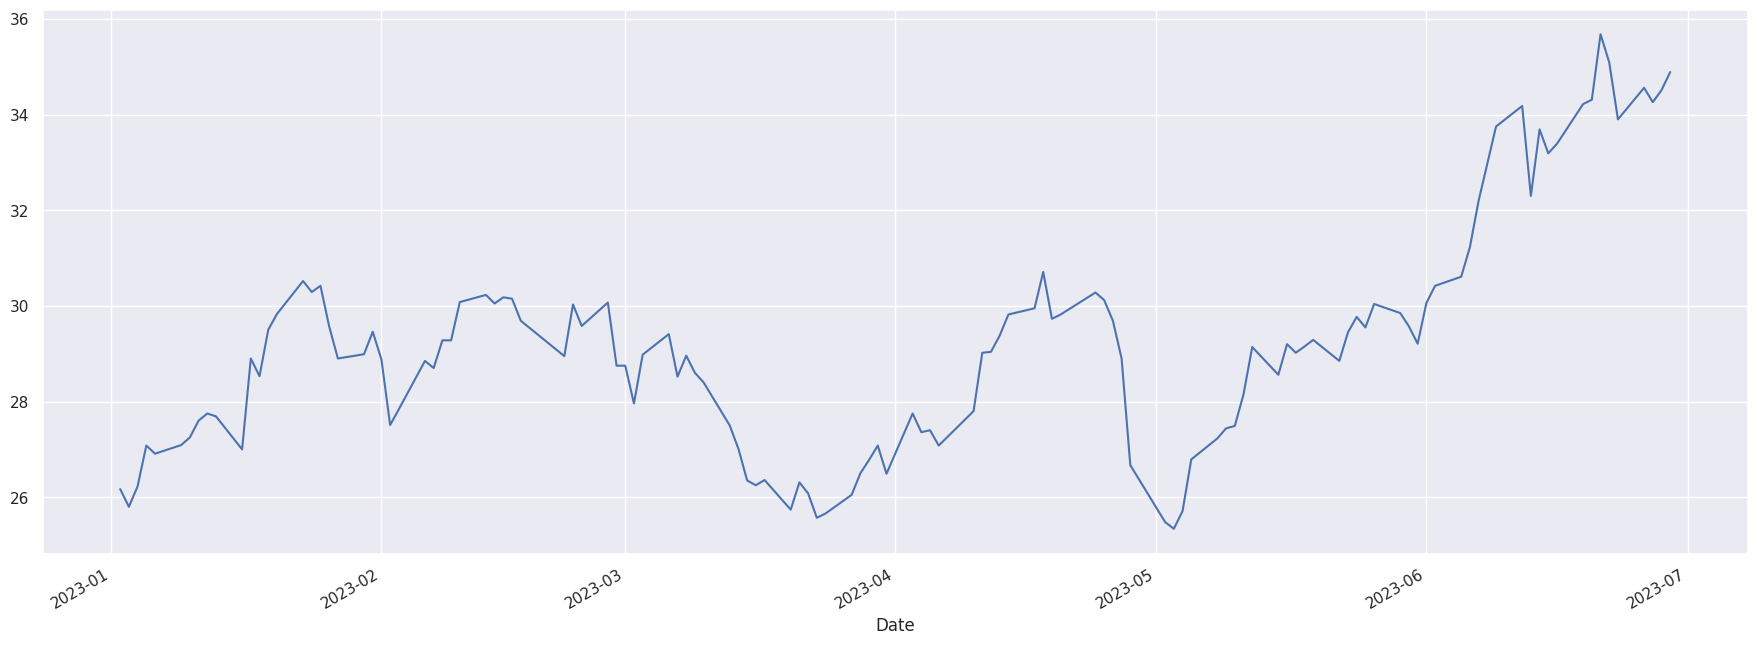

In [ ]:
tabela_cotacoes["Close"].plot(figsize=(22,8));

In [ ]:
ativos = ["PETR3.SA", "VALE3.SA"]
data_inicial = "2023-01-01"
data_final = "2023-06-30"

tabela_cotacoes = web.get_data_yahoo(ativos, data_inicial, data_final)["Adj Close"]
tabela_cotacoes

[*********************100%%**********************]  2 of 2 completed


Ticker       PETR3.SA   VALE3.SA
Date                            
2023-01-02  19.389074  80.482170
2023-01-03  19.114946  80.338135
2023-01-04  19.433525  80.482170
2023-01-05  20.063282  81.832550
2023-01-06  19.937332  83.128906
...               ...        ...
2023-06-23  29.589239  60.629215
2023-06-26  30.165314  60.758018
2023-06-27  29.903456  61.484829
2023-06-28  30.121668  59.543594
2023-06-29  30.453348  60.270409

[123 rows x 2 columns]

In [ ]:
tabela_cotacoes.dropna(inplace=True)
tabela_cotacoes

Ticker       PETR3.SA   VALE3.SA
Date                            
2023-01-02  19.389074  80.482170
2023-01-03  19.114946  80.338135
2023-01-04  19.433525  80.482170
2023-01-05  20.063282  81.832550
2023-01-06  19.937332  83.128906
...               ...        ...
2023-06-23  29.589239  60.629215
2023-06-26  30.165314  60.758018
2023-06-27  29.903456  61.484829
2023-06-28  30.121668  59.543594
2023-06-29  30.453348  60.270409

[123 rows x 2 columns]

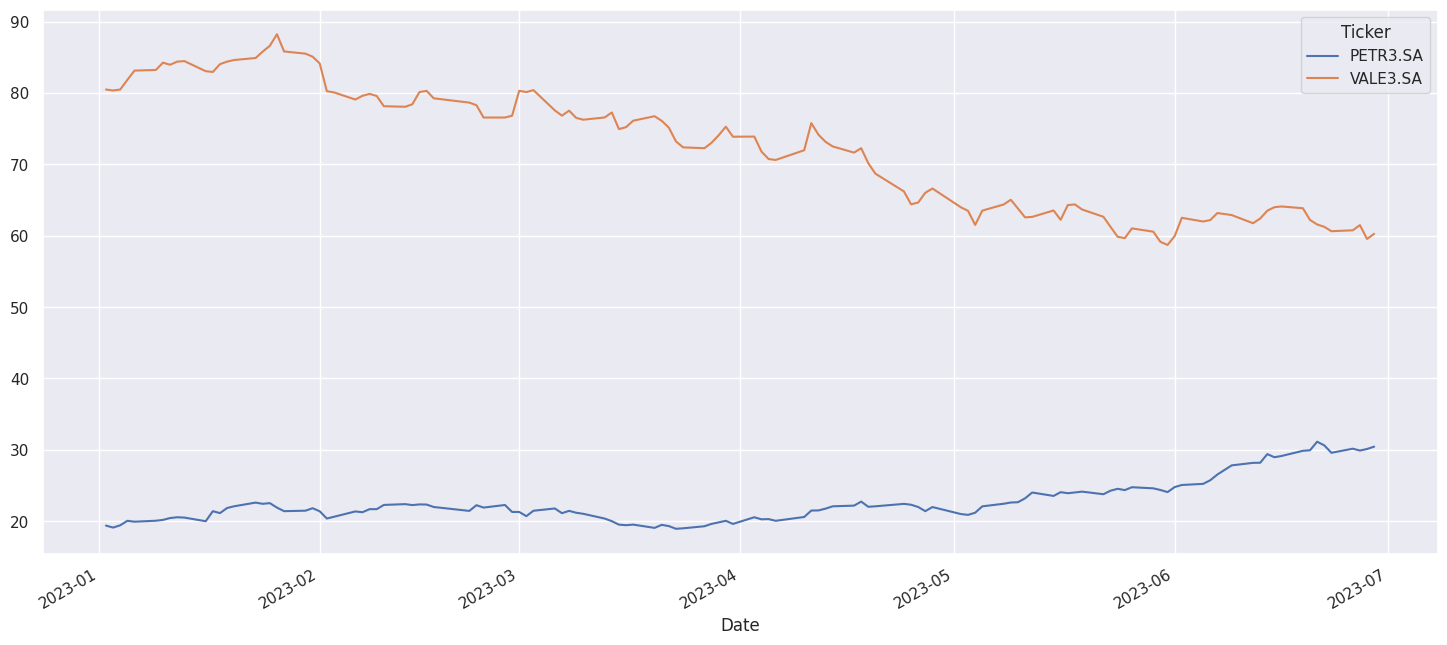

In [ ]:
sns.set()
tabela_cotacoes.plot(figsize=(18,8));

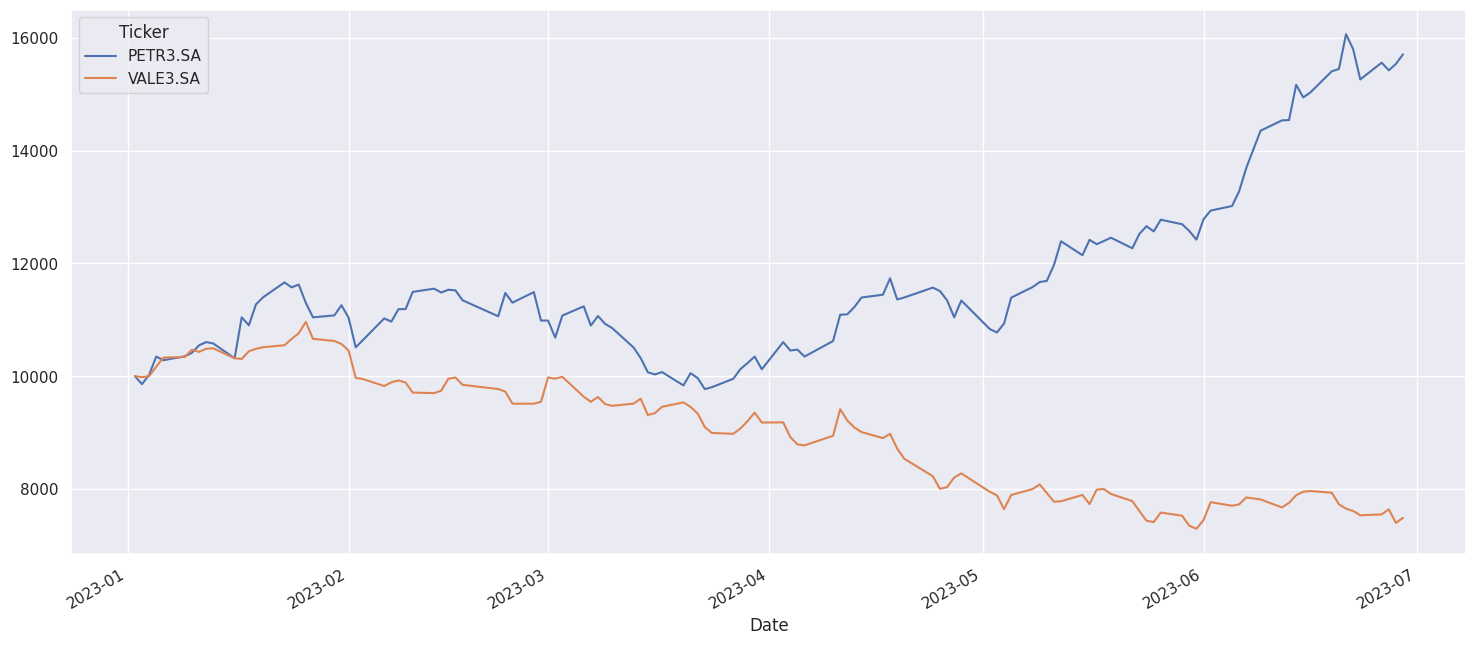

In [ ]:
carteira_normalizada = (tabela_cotacoes / tabela_cotacoes.iloc[0])*10000
#df.iloc[0] Selecionado a primeira linha do dataset
carteira_normalizada.plot(figsize=(18,8));

In [ ]:
carteira_normalizada["saldo"] = carteira_normalizada.sum(axis=1)
carteira_normalizada

Ticker          PETR3.SA      VALE3.SA         saldo
Date                                                
2023-01-02  10000.000000  10000.000000  20000.000000
2023-01-03   9858.617304   9982.103447  19840.720751
2023-01-04  10022.925674  10000.000000  20022.925674
2023-01-05  10347.725568  10167.786224  20515.511792
2023-01-06  10282.766376  10328.859938  20611.626314
...                  ...           ...           ...
2023-06-23  15260.779666   7533.248067  22794.027733
2023-06-26  15557.892664   7549.252016  23107.144680
2023-06-27  15422.838260   7639.559031  23062.397292
2023-06-28  15535.382121   7398.358454  22933.740575
2023-06-29  15706.447687   7488.665943  23195.113630

[123 rows x 3 columns]

In [ ]:
ibov = web.get_data_yahoo("^BVSP", data_inicial, data_final)["Adj Close"]

ibov_normalizado = (ibov / ibov.iloc[0])*20000
ibov_normalizado

[*********************100%%**********************]  1 of 1 completed


Date
2023-01-02    20000.000000
2023-01-03    19584.492743
2023-01-04    19804.091148
2023-01-05    20214.710085
2023-01-06    20462.510341
                  ...     
2023-06-23    22369.143416
2023-06-26    22231.142363
2023-06-27    22095.773483
2023-06-28    21937.467098
2023-06-29    22257.464090
Name: Adj Close, Length: 123, dtype: float64

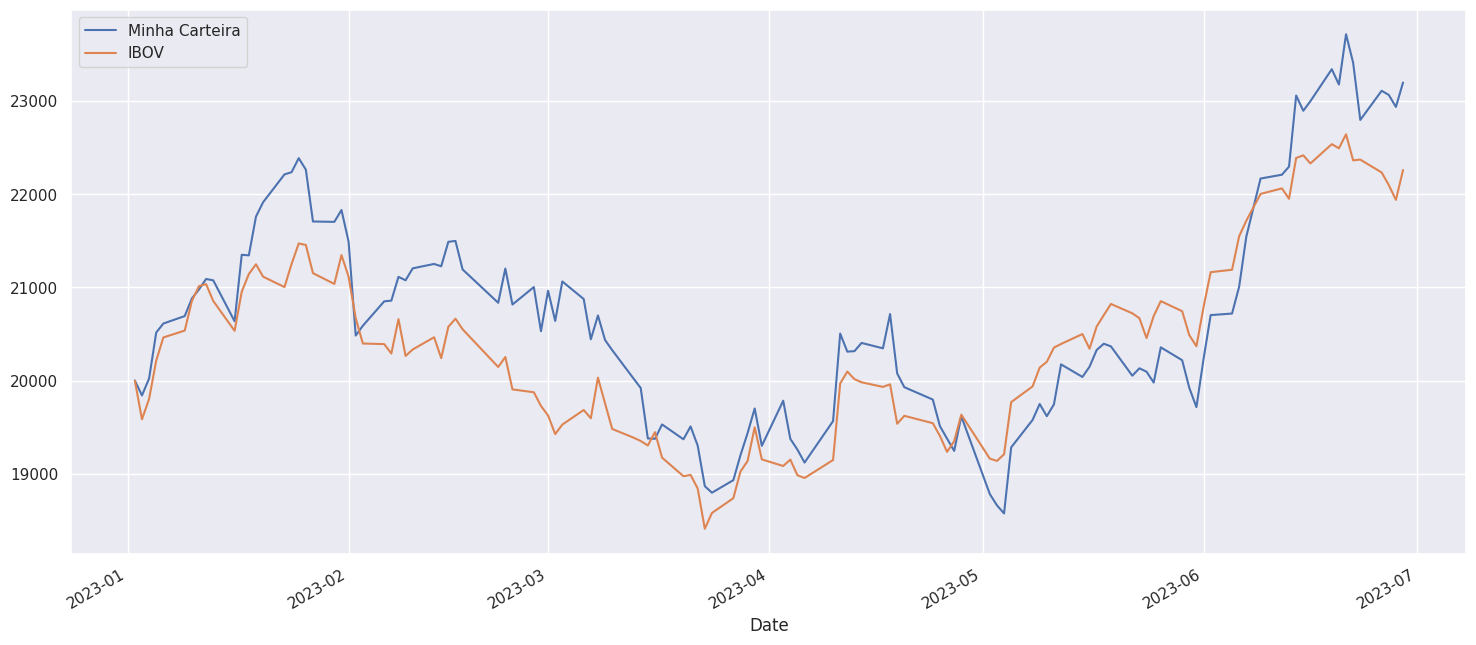

In [ ]:
carteira_normalizada["saldo"].plot(figsize=(18,8), label="Minha Carteira")
ibov_normalizado.plot(label="IBOV")
plt.legend();

In [ ]:
tickers_ibov = "ABEV3.SA, AZUL4.SA, B3SA3.SA, BBAS3.SA, BBDC3.SA, BBDC4.SA, BBSE3.SA, BPAC11.SA, BRAP4.SA, BRFS3.SA, BRKM5.SA, CCRO3.SA, CIEL3.SA"
dados_yahoo = yf.download(tickers=tickers_ibov, period='1y')["Adj Close"]
ibov = yf.download('BOVA11.SA', period='1y')["Adj Close"]
ibov = ibov / ibov.iloc[0]

retorno = dados_yahoo.pct_change()
retorno

[*********************100%%**********************]  13 of 13 completed
[*********************100%%**********************]  1 of 1 completed


Ticker      ABEV3.SA  AZUL4.SA  B3SA3.SA  BBAS3.SA  BBDC3.SA  BBDC4.SA  \
Date                                                                     
2023-05-03       NaN       NaN       NaN       NaN       NaN       NaN   
2023-05-04  0.003429  0.002655  0.027802  0.011268  0.023083  0.023273   
2023-05-05 -0.009569  0.026478  0.055790  0.025368  0.036261  0.049751   
2023-05-08  0.001380  0.007739 -0.004003 -0.003931  0.020995  0.037238   
2023-05-09 -0.000689  0.004266  0.009646 -0.003018  0.009901 -0.009791   
...              ...       ...       ...       ...       ...       ...   
2024-04-26 -0.000832  0.059653  0.036011  0.000000  0.015820  0.016105   
2024-04-29  0.007494  0.026612 -0.007130  0.006209  0.015574  0.012968   
2024-04-30  0.004132 -0.027916 -0.031418 -0.004719 -0.002421 -0.004267   
2024-05-02  0.014815  0.042051  0.025023  0.010576  0.002427 -0.011429   
2024-05-03  0.003244  0.077756  0.029837  0.018405  0.009476 -0.002968   

Ticker      BBSE3.SA  BPAC11.SA  BRAP4.SA  BRFS3.SA  BRKM5.SA  CCRO3.SA  \
Date                                                                      
2023-05-03       NaN        NaN       NaN       NaN       NaN       NaN   
2023-05-04 -0.011933   0.023831 -0.036542  0.015823  0.002085 -0.013869   
2023-05-05  0.010870   0.028879  0.039778  0.021807  0.236212  0.027387   
2023-05-08 -0.001493   0.011311  0.015124  0.070122  0.064815 -0.008645   
2023-05-09  0.008376   0.014913  0.001315  0.022792  0.038735  0.007994   
...              ...        ...       ...       ...       ...       ...   
2024-04-26  0.003126   0.046012  0.006689  0.010423  0.018758  0.000000   
2024-04-29  0.006232  -0.004692  0.018510 -0.012034 -0.018851  0.017115   
2024-04-30 -0.002787  -0.015910 -0.034651 -0.020882 -0.049151 -0.012019   
2024-05-02  0.006832   0.023054  0.014049 -0.010071  0.036654  0.016221   
2024-05-03  0.012955   0.033655  0.000990  0.000598  0.044878  0.017558   

Ticker      CIEL3.SA  
Date                  
2023-05-03       NaN  
2023-05-04  0.044118  
2023-05-05  0.002299  
2023-05-08  0.001779  
2023-05-09  0.014210  
...              ...  
2024-04-26  0.000000  
2024-04-29  0.000000  
2024-04-30 -0.003578  
2024-05-02  0.003591  
2024-05-03  0.000000  

[251 rows x 13 columns]

In [ ]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

Ticker      ABEV3.SA  AZUL4.SA  B3SA3.SA  BBAS3.SA  BBDC3.SA  BBDC4.SA  \
Date                                                                     
2023-05-03  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2023-05-04  1.003429  1.002655  1.027802  1.011268  1.023083  1.023273   
2023-05-05  0.993827  1.029204  1.085143  1.036922  1.060181  1.074182   
2023-05-08  0.995199  1.037168  1.080799  1.032846  1.082440  1.114182   
2023-05-09  0.994513  1.041593  1.091225  1.029729  1.093157  1.103273   
...              ...       ...       ...       ...       ...       ...   
2024-04-26  0.866787  0.864602  1.007793  1.487418  1.063391  1.066105   
2024-04-29  0.873283  0.887611  1.000607  1.496653  1.079952  1.079931   
2024-04-30  0.876892  0.862832  0.969170  1.489591  1.077337  1.075322   
2024-05-02  0.889883  0.899115  0.993422  1.505345  1.079952  1.063033   
2024-05-03  0.892769  0.969027  1.023063  1.533051  1.090186  1.059877   

Ticker      BBSE3.SA  BPAC11.SA  BRAP4.SA  BRFS3.SA  BRKM5.SA  CCRO3.SA  \
Date                                                                      
2023-05-03  1.000000   1.000000  1.000000  1.000000  1.000000  1.000000   
2023-05-04  0.988067   1.023831  0.963458  1.015823  1.002085  0.986131   
2023-05-05  0.998807   1.053398  1.001783  1.037975  1.238790  1.013139   
2023-05-08  0.997315   1.065313  1.016934  1.110759  1.319082  1.004380   
2023-05-09  1.005668   1.081200  1.018271  1.136076  1.370177  1.012409   
...              ...        ...       ...       ...       ...       ...   
2024-04-26  1.045310   1.539784  1.005598  2.761076  1.189260  0.912024   
2024-04-29  1.051825   1.532560  1.024211  2.727848  1.166840  0.927634   
2024-04-30  1.048893   1.508176  0.988721  2.670886  1.109489  0.916484   
2024-05-02  1.056059   1.542945  1.002612  2.643987  1.150156  0.931350   
2024-05-03  1.069741   1.594873  1.003604  2.645569  1.201773  0.947703   

Ticker      CIEL3.SA  
Date                  
2023-05-03  1.000000  
2023-05-04  1.044118  
2023-05-05  1.046518  
2023-05-08  1.048380  
2023-05-09  1.063277  
...              ...  
2024-04-26  1.128338  
2024-04-29  1.128338  
2024-04-30  1.124301  
2024-05-02  1.128338  
2024-05-03  1.128338  

[251 rows x 13 columns]

In [ ]:
carteira = random.sample(list(dados_yahoo.columns) , k=5)
carteira = 10000 * retorno_acumulado.loc[: , carteira]
carteira['saldo'] = carteira.sum(axis=1)
carteira["retorno"] = carteira['saldo'].pct_change()
carteira

Ticker          BBDC4.SA      BBSE3.SA      B3SA3.SA     BPAC11.SA  \
Date                                                                 
2023-05-03  10000.000000  10000.000000  10000.000000  10000.000000   
2023-05-04  10232.725363   9880.667031  10278.019244  10238.305345   
2023-05-05  10741.817046   9988.065958  10851.433025  10533.981118   
2023-05-08  11141.816605   9973.149647  10807.992223  10653.133360   
2023-05-09  11032.725950  10056.681731  10912.250832  10812.003590   
...                  ...           ...           ...           ...   
2024-04-26  10661.051642  10453.099083  10077.929267  15397.843054   
2024-04-29  10799.307419  10518.247970  10006.072444  15325.595176   
2024-04-30  10753.221671  10488.931033   9691.698201  15081.759663   
2024-05-02  10630.327810  10560.593690   9934.215621  15429.451393   
2024-05-03  10598.773643  10697.406477  10230.625230  15948.734202   

Ticker          ABEV3.SA         saldo   retorno  
Date                                              
2023-05-03  10000.000000  50000.000000       NaN  
2023-05-04  10034.293221  50664.010205  0.013280  
2023-05-05   9938.270963  52053.568109  0.027427  
2023-05-08   9951.989215  52528.081051  0.009116  
2023-05-09   9945.130434  52758.792536  0.004392  
...                  ...           ...       ...  
2024-04-26   8667.874519  55257.797564  0.022614  
2024-04-29   8732.829558  55382.052566  0.002249  
2024-04-30   8768.915078  54784.525646 -0.010789  
2024-05-02   8898.825156  55453.413669  0.012209  
2024-05-03   8927.693985  56403.233537  0.017128  

[251 rows x 7 columns]

<Axes: xlabel='Date'>

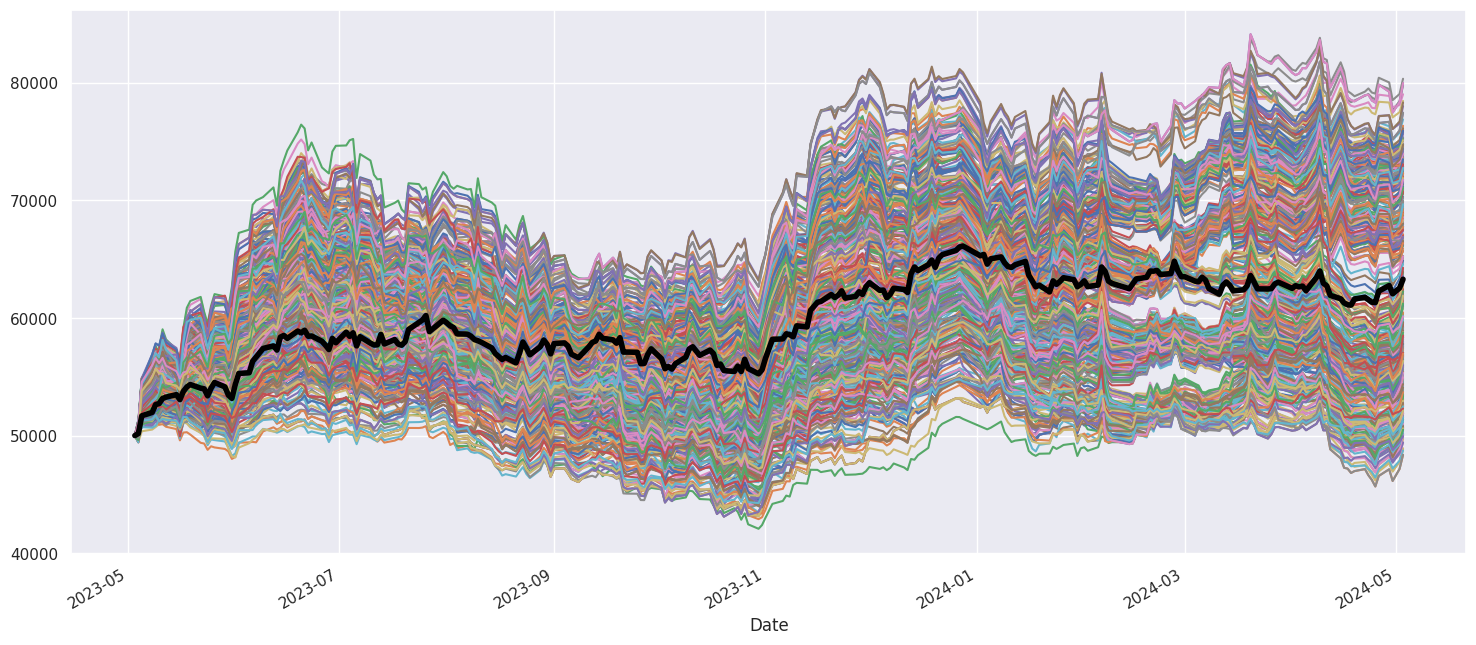

In [ ]:
for i in range(500):
  carteira = random.sample(list(dados_yahoo.columns) , k=5)
  carteira = 10000 * retorno_acumulado.loc[: , carteira]
  carteira['saldo'] = carteira.sum(axis=1)
  carteira['saldo'].plot(figsize=(18,8))

(ibov*50000).plot(linewidth=4, color='black')


In [ ]:
def calcula_retorno(dataframe):
  df = dataframe.copy()
  df['daily_return'] = df.iloc[:,0].pct_change()
  df['acum_return'] = (1 + df['daily_return']).cumprod()
  df['acum_return'].iloc[0] = 1
  df.rename(columns={df.columns[0]: "price" }, inplace=True)
  return df

In [ ]:
ibov = yf.download('^BVSP', start='1995-01-01')[['Adj Close']]
ibov = calcula_retorno(ibov)
ibov

[*********************100%%**********************]  1 of 1 completed


price  daily_return  acum_return
Date                                                
1995-01-02    4301.000000           NaN     1.000000
1995-01-03    4098.000000     -0.047198     0.952802
1995-01-04    3967.899902     -0.031747     0.922553
1995-01-05    4036.699951      0.017339     0.938549
1995-01-06    3827.399902     -0.051849     0.889886
...                   ...           ...          ...
2024-04-26  126526.000000      0.015083    29.417810
2024-04-29  127352.000000      0.006528    29.609858
2024-04-30  125924.000000     -0.011213    29.277842
2024-05-02  127122.000000      0.009514    29.556382
2024-05-03  128508.671875      0.010908    29.878789

[7261 rows x 3 columns]

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=ibov.index, y=ibov['price']))
fig.show()

In [ ]:
ibov_melhores = ibov['daily_return'].sort_values(ascending=False)[:10]
ibov_melhores

Date
1999-01-15    0.334190
1995-03-10    0.256232
1998-09-15    0.186834
2008-10-13    0.146560
2020-03-13    0.139082
2008-10-28    0.134262
1998-09-11    0.133795
1995-03-14    0.129544
1995-02-23    0.120109
1998-09-23    0.109756
Name: daily_return, dtype: float64

In [ ]:
ibov_piores = ibov['daily_return'].sort_values(ascending=True)[:10]
ibov_piores

Date
1998-09-10   -0.158090
1997-10-27   -0.149675
2020-03-12   -0.147797
2020-03-16   -0.139215
2020-03-09   -0.121738
2008-10-15   -0.113931
2020-03-18   -0.103488
1997-11-12   -0.102055
2008-10-22   -0.101760
1999-01-14   -0.099697
Name: daily_return, dtype: float64

In [ ]:
ibov_sem_melhores_dias = (1 + ibov['daily_return'].drop(ibov_melhores.index)).cumprod()
ibov_sem_piores_dias = (1 + ibov['daily_return'].drop(ibov_piores.index)).cumprod()
print("Retorno do IBOV desde 1995 : {:.2%}".format(ibov['acum_return'].iloc[-1] - 1))
print("Retorno do IBOV sem os 10 piores dias : {:.2%}".format(ibov_sem_piores_dias.iloc[-1] - 1))
print("Retorno do IBOV sem os 10 melhores dias: {:.2%}".format(ibov_sem_melhores_dias.iloc[-1] - 1))


Retorno do IBOV desde 1995 : 2887.88%
Retorno do IBOV sem os 10 piores dias : 11130.43%
Retorno do IBOV sem os 10 melhores dias: 536.93%


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=ibov.index, y=ibov['acum_return'], name='IBOV'))
fig.add_trace(go.Scatter(x=ibov_sem_melhores_dias.index,
y=ibov_sem_melhores_dias.values,name='IBOV sem 10 melhores dias'))
fig.add_trace(go.Scatter(x=ibov_sem_melhores_dias.index,
y=ibov_sem_piores_dias.values, name='IBOV sem 10 piores dias'))
fig.show()

Atividade 1

In [ ]:
ativos = ["KLBN3.SA", "EGIE3.SA", "WEGE3.SA", "ITSA3.SA", "GOGL34.SA"]
data_inicial = "2023-01-01"
data_final = "2023-06-30"

tabela_1 = web.get_data_yahoo(ativos, data_inicial, data_final)["Adj Close"]
tabela_1

[*********************100%%**********************]  5 of 5 completed


Ticker       EGIE3.SA  GOGL34.SA  ITSA3.SA  KLBN3.SA   WEGE3.SA
Date                                                           
2023-01-02  34.845303  39.500000  7.576390  3.747851  37.125931
2023-01-03  34.527847  40.590000  7.490586  3.766451  36.200218
2023-01-04  34.546524  39.590000  7.464844  3.812950  36.443829
2023-01-05  34.322437  38.450001  7.627869  3.822249  36.521782
2023-01-06  34.425144  37.900002  7.636450  3.785051  37.057724
...               ...        ...       ...       ...        ...
2023-06-23  44.739853  48.570000  8.610278  4.385893  35.917118
2023-06-26  43.766190  47.090000  8.583838  4.289711  35.777840
2023-06-27  43.698032  47.250000  8.530961  4.251238  35.876125
2023-06-28  43.639614  48.549999  8.442831  4.164674  35.954762
2023-06-29  43.853821  48.009998  8.610278  4.174293  36.210312

[123 rows x 5 columns]

In [ ]:
tabela_1.dropna(inplace=True)
tabela_1

Ticker       EGIE3.SA  GOGL34.SA  ITSA3.SA  KLBN3.SA   WEGE3.SA
Date                                                           
2023-01-02  34.845303  39.500000  7.576390  3.747851  37.125931
2023-01-03  34.527847  40.590000  7.490586  3.766451  36.200218
2023-01-04  34.546524  39.590000  7.464844  3.812950  36.443829
2023-01-05  34.322437  38.450001  7.627869  3.822249  36.521782
2023-01-06  34.425144  37.900002  7.636450  3.785051  37.057724
...               ...        ...       ...       ...        ...
2023-06-23  44.739853  48.570000  8.610278  4.385893  35.917118
2023-06-26  43.766190  47.090000  8.583838  4.289711  35.777840
2023-06-27  43.698032  47.250000  8.530961  4.251238  35.876125
2023-06-28  43.639614  48.549999  8.442831  4.164674  35.954762
2023-06-29  43.853821  48.009998  8.610278  4.174293  36.210312

[123 rows x 5 columns]

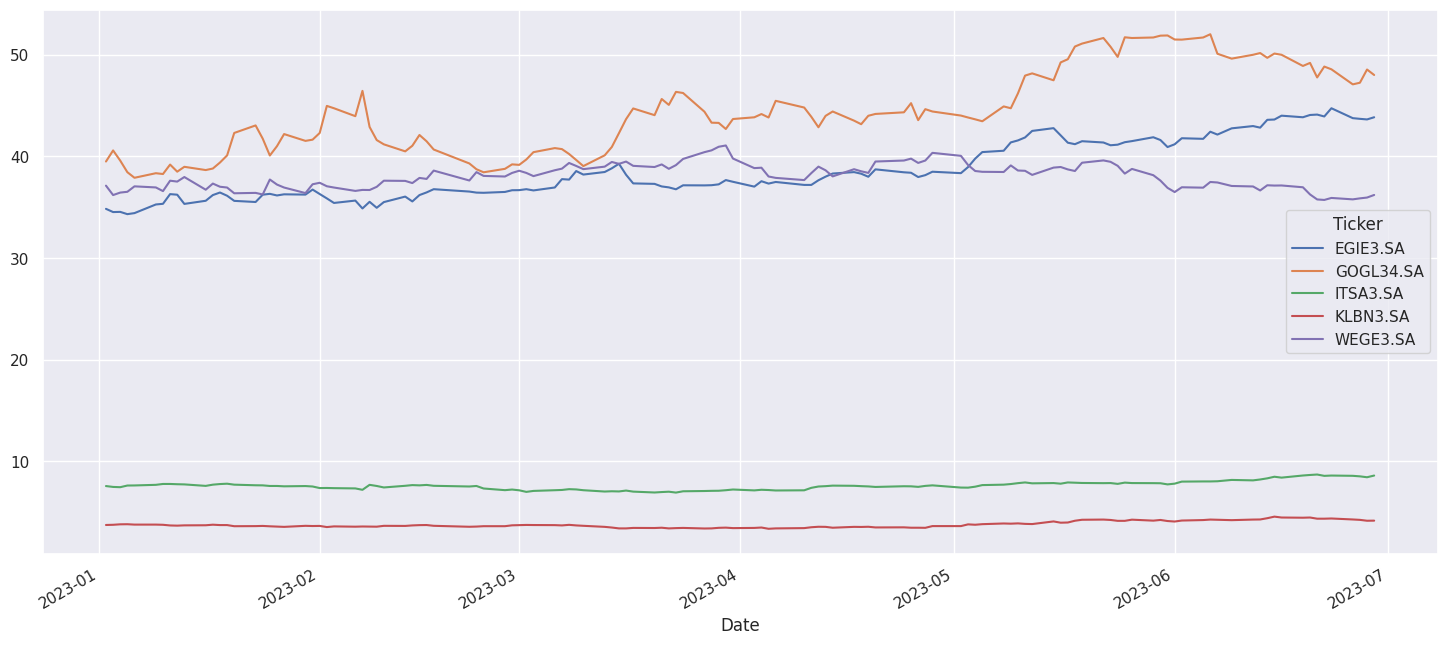

In [ ]:
sns.set()
tabela_1.plot(figsize=(18,8));

Atividade 2

In [ ]:
ativos = ["KLBN3.SA", "EGIE3.SA", "WEGE3.SA", "ITSA3.SA", "GOGL34.SA", "ROXO34.SA", "INTR34.SA", "AMZO34.SA", "AAPL34.SA", "ABEV3.SA"]
data_inicial = "2023-01-01"
data_final = "2023-06-30"

tabela_2 = web.get_data_yahoo(ativos, data_inicial, data_final)["Adj Close"]
tabela_2

[*********************100%%**********************]  10 of 10 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['ROXO34.SA']: Exception("%ticker%: Data doesn't exist for startDate = 1672542000, endDate = 1688094000")
ERROR:yfinance:['INTR34.SA']: Exception('%ticker%: No timezone found, symbol may be delisted')


Ticker      AAPL34.SA   ABEV3.SA  AMZO34.SA   EGIE3.SA  GOGL34.SA  INTR34.SA  \
Date                                                                           
2023-01-02  34.788429  13.485133  22.790001  34.845303  39.500000        NaN   
2023-01-03  33.854111  13.466127  23.370001  34.527847  40.590000        NaN   
2023-01-04  33.873993  13.542153  22.959999  34.546524  39.590000        NaN   
2023-01-05  33.128529  13.580167  22.139999  34.322437  38.450001        NaN   
2023-01-06  33.426712  13.608676  22.270000  34.425144  37.900002        NaN   
...               ...        ...        ...        ...        ...        ...   
2023-06-23  44.369732  14.720558  30.850000  44.739853  48.570000        NaN   
2023-06-26  43.941090  14.578010  30.320000  43.766190  47.090000        NaN   
2023-06-27  45.057564  14.616023  30.920000  43.698032  47.250000        NaN   
2023-06-28  45.655670  14.463970  31.230000  43.639614  48.549999        NaN   
2023-06-29  45.884945  14.463970  31.000000  43.853821  48.009998        NaN   

Ticker      ITSA3.SA  KLBN3.SA  ROXO34.SA   WEGE3.SA  
Date                                                  
2023-01-02  7.576390  3.747851        NaN  37.125931  
2023-01-03  7.490586  3.766451        NaN  36.200218  
2023-01-04  7.464844  3.812950        NaN  36.443829  
2023-01-05  7.627869  3.822249        NaN  36.521782  
2023-01-06  7.636450  3.785051        NaN  37.057724  
...              ...       ...        ...        ...  
2023-06-23  8.610278  4.385893        NaN  35.917118  
2023-06-26  8.583838  4.289711        NaN  35.777840  
2023-06-27  8.530961  4.251238        NaN  35.876125  
2023-06-28  8.442831  4.164674        NaN  35.954762  
2023-06-29  8.610278  4.174293        NaN  36.210312  

[123 rows x 10 columns]

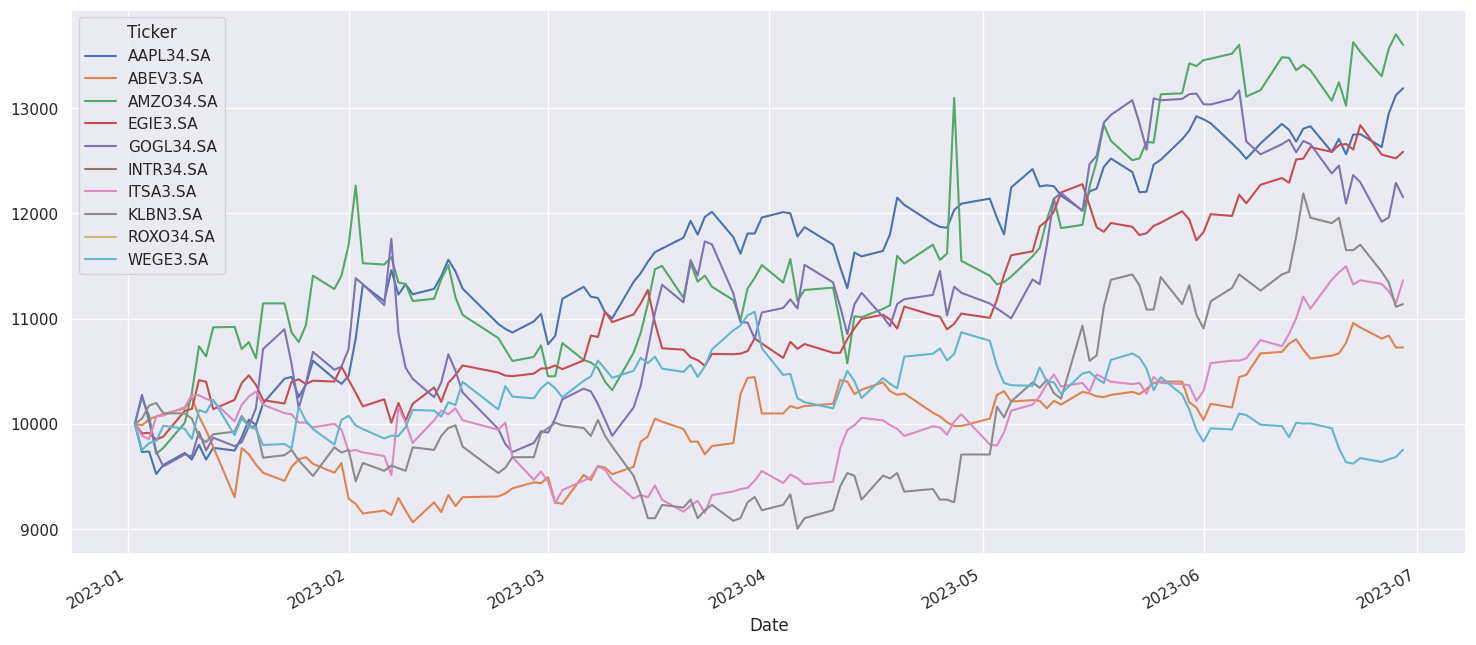

In [ ]:
carteira_correta = (tabela_2 / tabela_2.iloc[0])*10000
#df.iloc[0] Selecionado a primeira linha do dataset
carteira_correta.plot(figsize=(18,8));

In [ ]:
carteira_correta["saldo"] = carteira_correta.sum(axis=1)
carteira_correta

Ticker         AAPL34.SA      ABEV3.SA     AMZO34.SA      EGIE3.SA  \
Date                                                                 
2023-01-02  10000.000000  10000.000000  10000.000000  10000.000000   
2023-01-03   9731.428362   9985.906127  10254.497543   9908.895814   
2023-01-04   9737.143539  10042.283741  10074.593314   9914.255721   
2023-01-05   9522.858404  10070.472901   9714.786529   9849.946691   
2023-01-06   9608.571800  10091.614064   9771.829558   9879.421800   
...                  ...           ...           ...           ...   
2023-06-23  12754.163625  10916.138521  13536.638500  12839.565046   
2023-06-26  12630.949590  10810.430583  13304.080069  12560.140487   
2023-06-27  12951.882203  10838.619744  13567.353591  12540.580549   
2023-06-28  13123.809018  10725.863809  13703.377923  12523.815514   
2023-06-29  13189.714480  10725.863809  13602.456672  12585.289136   

Ticker         GOGL34.SA  INTR34.SA      ITSA3.SA      KLBN3.SA  ROXO34.SA  \
Date                                                                         
2023-01-02  10000.000000        NaN  10000.000000  10000.000000        NaN   
2023-01-03  10275.949406        NaN   9886.747568  10049.628407        NaN   
2023-01-04  10022.784849        NaN   9852.771524  10173.696881        NaN   
2023-01-05   9734.177408        NaN  10067.946424  10198.509812        NaN   
2023-01-06   9594.937095        NaN  10079.272612  10099.256814        NaN   
...                  ...        ...           ...           ...        ...   
2023-06-23  12296.202454        NaN  11364.618013  11702.420910        NaN   
2023-06-26  11921.519026        NaN  11329.720567  11445.788850        NaN   
2023-06-27  11962.025316        NaN  11259.928194  11343.135008        NaN   
2023-06-28  12291.139047        NaN  11143.606312  11112.165137        NaN   
2023-06-29  12154.429955        NaN  11364.618013  11137.831142        NaN   

Ticker          WEGE3.SA         saldo  
Date                                    
2023-01-02  10000.000000  80000.000000  
2023-01-03   9750.656060  79843.709287  
2023-01-04   9816.273373  79633.802941  
2023-01-05   9837.270379  78995.968549  
2023-01-06   9981.628262  79106.532006  
...                  ...           ...  
2023-06-23   9674.402045  95084.149114  
2023-06-26   9636.886915  93639.516088  
2023-06-27   9663.360507  94126.885113  
2023-06-28   9684.541436  94308.318197  
2023-06-29   9753.374831  94513.578037  

[123 rows x 11 columns]

In [ ]:
ibov1 = web.get_data_yahoo("^BVSP", data_inicial, data_final)["Adj Close"]

ibov_correta = (ibov1 / ibov1.iloc[0])*20000
ibov_correta

[*********************100%%**********************]  1 of 1 completed


Date
2023-01-02    20000.000000
2023-01-03    19584.492743
2023-01-04    19804.091148
2023-01-05    20214.710085
2023-01-06    20462.510341
                  ...     
2023-06-23    22369.143416
2023-06-26    22231.142363
2023-06-27    22095.773483
2023-06-28    21937.467098
2023-06-29    22257.464090
Name: Adj Close, Length: 123, dtype: float64

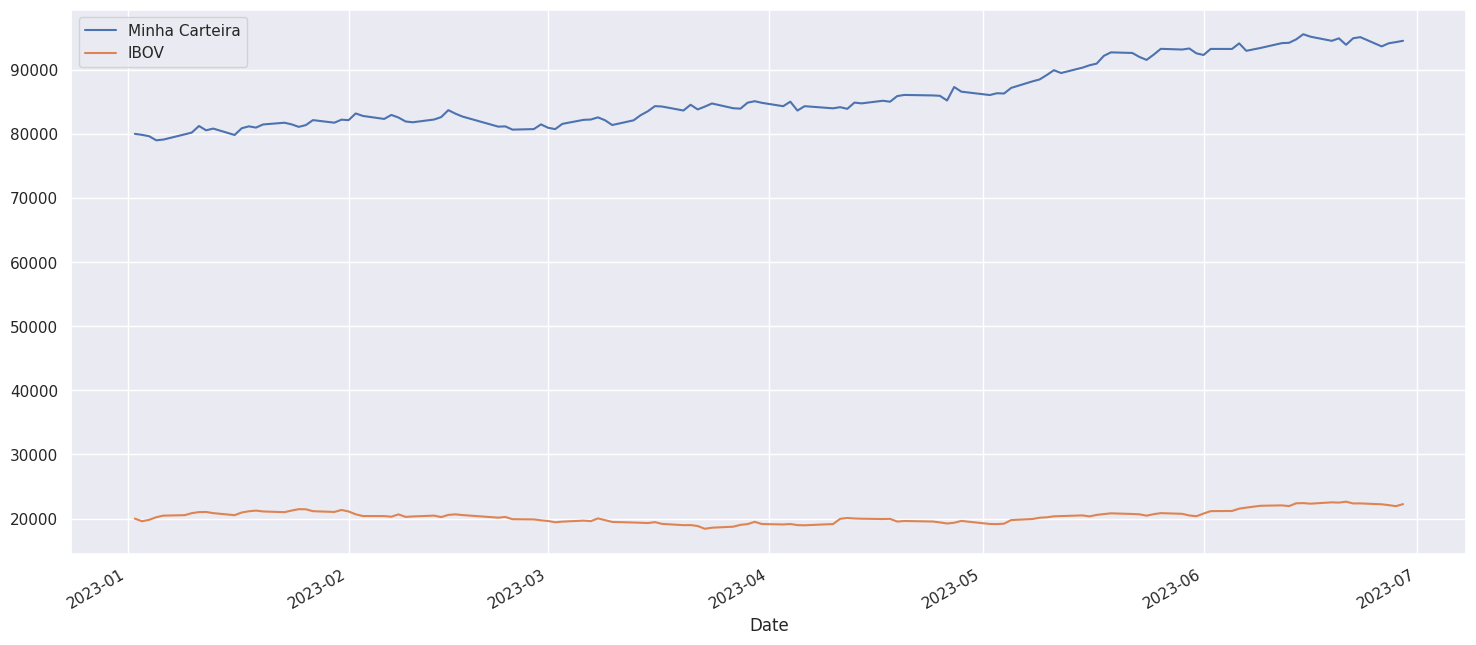

In [ ]:
carteira_correta["saldo"].plot(figsize=(18,8), label="Minha Carteira")
ibov_correta.plot(label="IBOV")
plt.legend();

#### Como podemos ver a nossa carteira ganhou mais hehe

Atividade 3

In [ ]:
ativos = ["XRP-USD", "DOGE-USD", "GLM-USD", "HBAR-USD"]
data_inicial1 = "2023-01-01"
data_final1 = "2023-12-31"

tabela_3 = web.get_data_yahoo(ativos, data_inicial1, data_final1)["Adj Close"]
tabela_3

[*********************100%%**********************]  4 of 4 completed


Ticker      DOGE-USD   GLM-USD  HBAR-USD   XRP-USD
Date                                              
2023-01-01  0.070225  0.180077  0.038084  0.338763
2023-01-02  0.071454  0.181658  0.038861  0.348556
2023-01-03  0.070468  0.179190  0.038125  0.343824
2023-01-04  0.073237  0.183506  0.038506  0.347794
2023-01-05  0.071550  0.183057  0.038302  0.338039
...              ...       ...       ...       ...
2023-12-26  0.091356  0.246937  0.089798  0.622369
2023-12-27  0.093579  0.250242  0.092212  0.634856
2023-12-28  0.091884  0.245400  0.089548  0.634998
2023-12-29  0.091038  0.242379  0.089047  0.623402
2023-12-30  0.090148  0.240231  0.087126  0.621844

[364 rows x 4 columns]

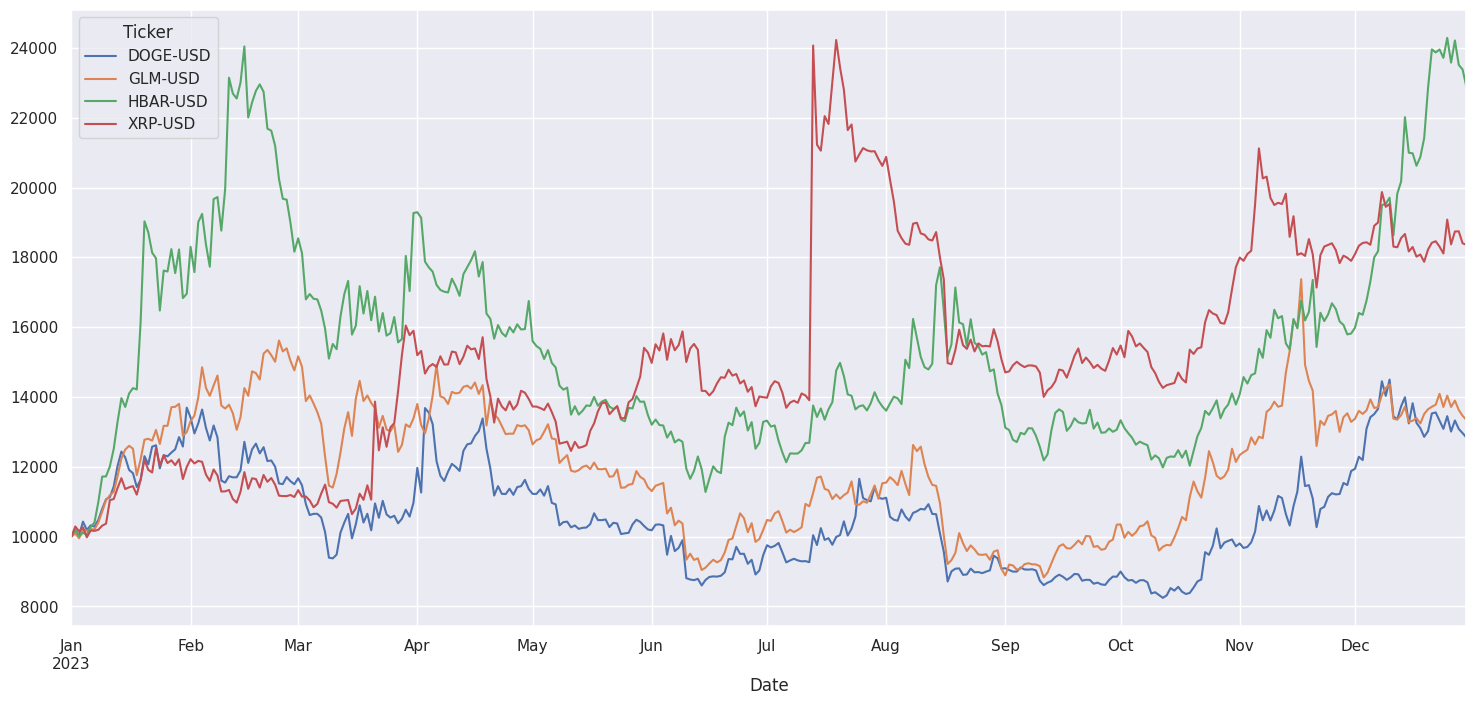

In [ ]:
carteira_correta1 = (tabela_3 / tabela_3.iloc[0])*10000
#df.iloc[0] Selecionado a primeira linha do dataset
carteira_correta1.plot(figsize=(18,8));

In [ ]:
carteira_correta1["saldo"] = carteira_correta1.sum(axis=1)
carteira_correta1

Ticker          DOGE-USD       GLM-USD      HBAR-USD       XRP-USD  \
Date                                                                 
2023-01-01  10000.000000  10000.000000  10000.000000  10000.000000   
2023-01-02  10175.009336  10087.795681  10204.022343  10289.081552   
2023-01-03  10034.603159   9950.742931  10010.765819  10149.396499   
2023-01-04  10428.907298  10190.418298  10110.807920  10266.587490   
2023-01-05  10188.678725  10165.484420  10057.241955   9978.628486   
...                  ...           ...           ...           ...   
2023-12-26  13009.042549  13712.856429  23578.931470  18371.811384   
2023-12-27  13325.596471  13896.388369  24212.792289  18740.416997   
2023-12-28  13084.229490  13627.503493  23513.285995  18744.609835   
2023-12-29  12963.759782  13459.741825  23381.734848  18402.304918   
2023-12-30  12837.024054  13340.460214  22877.324051  18356.313891   

Ticker             saldo  
Date                      
2023-01-01  40000.000000  
2023-01-02  40755.908913  
2023-01-03  40145.508408  
2023-01-04  40996.721005  
2023-01-05  40390.033586  
...                  ...  
2023-12-26  68672.641832  
2023-12-27  70175.194126  
2023-12-28  68969.628813  
2023-12-29  68207.541373  
2023-12-30  67411.122211  

[364 rows x 5 columns]

In [ ]:
ibov2 = web.get_data_yahoo("^BVSP", data_inicial1, data_final1)["Adj Close"]

ibov_correta1 = (ibov1 / ibov1.iloc[0])*20000
ibov_correta1

[*********************100%%**********************]  1 of 1 completed


Date
2023-01-02    20000.000000
2023-01-03    19584.492743
2023-01-04    19804.091148
2023-01-05    20214.710085
2023-01-06    20462.510341
                  ...     
2023-06-23    22369.143416
2023-06-26    22231.142363
2023-06-27    22095.773483
2023-06-28    21937.467098
2023-06-29    22257.464090
Name: Adj Close, Length: 123, dtype: float64

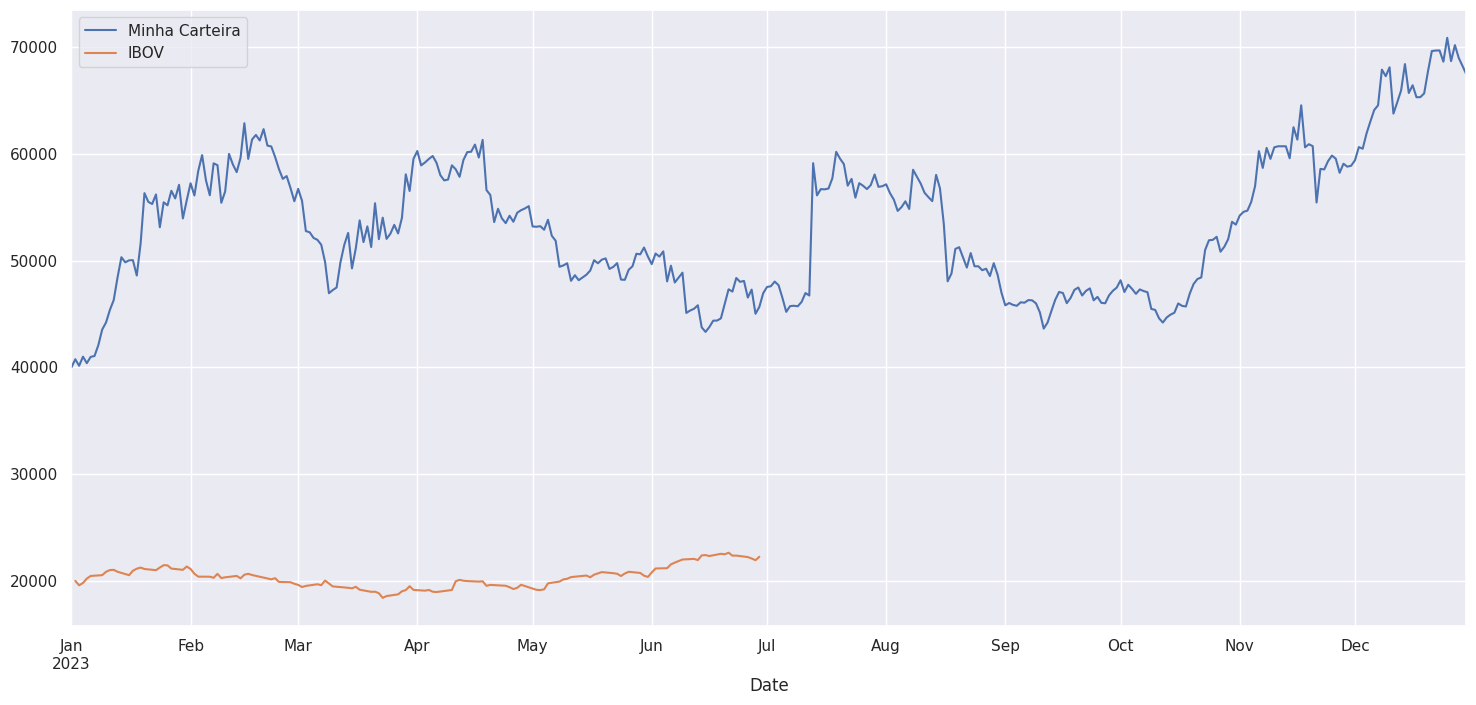

In [ ]:
carteira_correta1["saldo"].plot(figsize=(18,8), label="Minha Carteira")
ibov_correta1.plot(label="IBOV")
plt.legend();

Atividade 4

In [ ]:
GSPC = web.get_data_yahoo("^GSPC", data_inicial1, data_final1)["Adj Close"]

GSPC_correta = (GSPC / GSPC.iloc[0])*20000
GSPC_correta

[*********************100%%**********************]  1 of 1 completed


Date
2023-01-03    20000.000000
2023-01-04    20150.779412
2023-01-05    19916.112928
2023-01-06    20371.012502
2023-01-09    20355.375050
                  ...     
2023-12-22    24866.401420
2023-12-26    24971.628309
2023-12-27    25007.349168
2023-12-28    25016.606254
2023-12-29    24945.897442
Name: Adj Close, Length: 250, dtype: float64

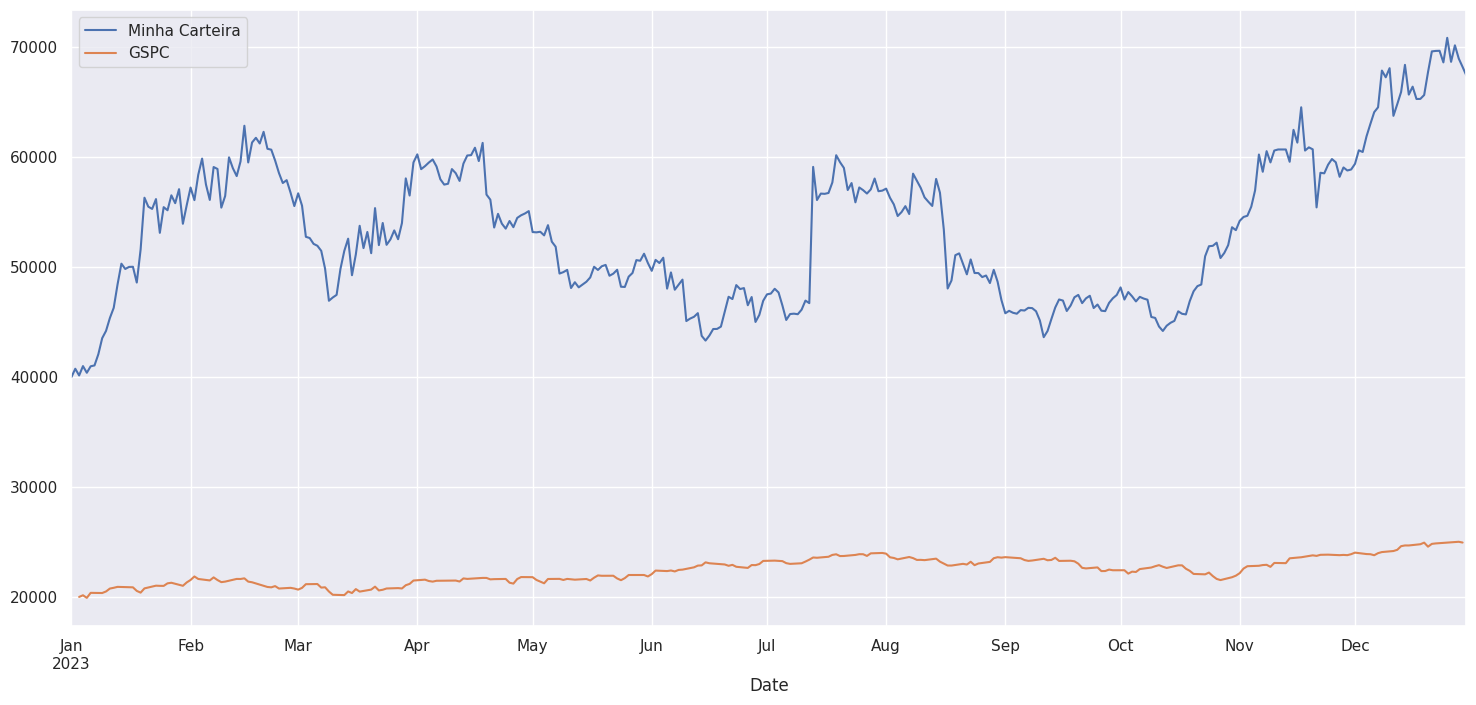

In [ ]:
carteira_correta1["saldo"].plot(figsize=(18,8), label="Minha Carteira")
GSPC_correta.plot(label="GSPC")
plt.legend();